In [1]:
import openai
import json
import requests
from PIL import Image
import io
from openai import OpenAI
import cloudinary
import cloudinary.uploader
from io import BytesIO
import numpy as np
import pandas as pd

In [2]:
from datasets import load_dataset
roco_dataset = load_dataset("MedIR/roco")

/ext3/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
image_paths = []
for i in range(1000):
    image_paths.append(roco_dataset['test'][i]['image'])

In [4]:
file_path = 'qa_dataset_with_images_1000.json'
with open(file_path,'r') as file:
    qa_dataset_with_images = json.load(file)

In [5]:
qa_dataset_with_images[999]

{'question': 'What feature of the linear scanner allowed visualization of the anechoic area in this case?',
 'answer': 'The use of a 5 MHz frequency allowed clear visualization of the anechoic area and its contents.',
 'new_image_path': 'http://res.cloudinary.com/dzylb0py5/image/upload/v1718116111/hwj4fnxrn5rfwqpoq0hc.png',
 'response4o_2': 'Higher frequency provided better resolution of superficial anechoic structures.'}

In [6]:
roco_dataset['test'][999]

{'id': 'ROCO_10141',
 'semtypes': ['T074: Medical Device',
  'T121: Pharmacologic Substance',
  'T129: Immunologic Factor'],
 'cuis': ['C0183115', 'C2702329'],
 'caption': ' 5\u2009MHz linear scanner. The anechoic area containing a hyperechoic fibrinous matrix extends beyond the 7\u2009cm depth range of the linear scanner.',
 'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=600x674>}

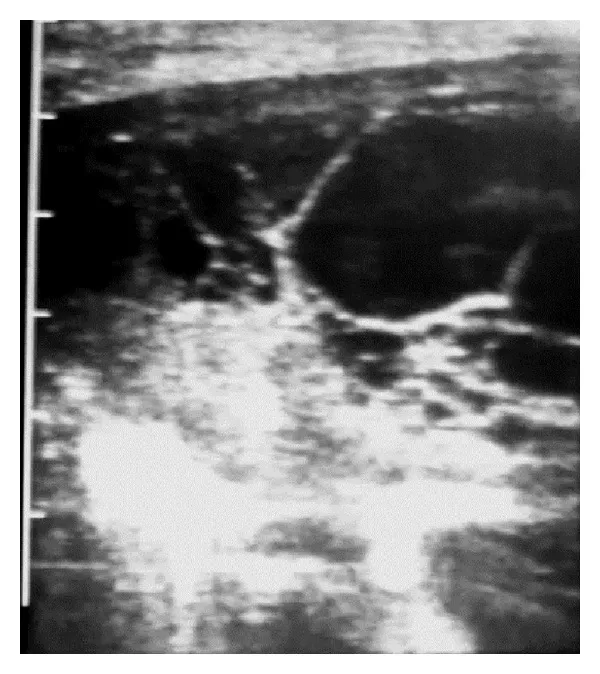

In [5]:
image_paths[999]

In [6]:
file_path = 'roco_qa_dataset.json'
# Read the list from the JSON file
with open(file_path, 'r') as file:
    qa_dataset = json.load(file)

In [7]:
qa_dataset[999]

{'question': 'What feature of the linear scanner allowed visualization of the anechoic area in this case?',
 'answer': 'The use of a 5 MHz frequency allowed clear visualization of the anechoic area and its contents.'}

## Create URL from buffer

In [27]:
import json
from PIL import Image

# Combine the QA pairs with the corresponding images
qa_dataset_with_images = []
for qa_pair, img_path in zip(qa_dataset, image_paths):
    # Combine the QA pair with the image path or image object
    qa_dataset_with_images.append({
        'question': qa_pair['question'],
        'answer': qa_pair['answer'],
        'image_path': img_path, # Use this if you want to store the path
    })


In [28]:
len(qa_dataset_with_images)

1000

In [29]:
qa_dataset_with_images[999]

{'question': 'What feature of the linear scanner allowed visualization of the anechoic area in this case?',
 'answer': 'The use of a 5 MHz frequency allowed clear visualization of the anechoic area and its contents.',
 'image_path': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=600x674>}

In [33]:
image = roco_dataset['test'][999]['image']

In [34]:
print(image)

<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=600x674 at 0x1497FA0D1850>


In [35]:
# Configure Cloudinary with your API credentials
cloudinary.config( 
      cloud_name = "dzylb0py5", 
      api_key = "196236893578335", 
      api_secret = "BPfciZBycpb7ZPEh2QvApJjRnSA"  
)

# Assuming 'image' is your PIL Image object
# Save your PIL image to a bytes buffer

buffer = BytesIO()
image.save(buffer, format="PNG")  # Or any format your image is in
buffer.seek(0)

# Upload the image from the bytes buffer
response = cloudinary.uploader.upload(buffer)

# The URL of the uploaded image is in the response JSON under 'url'
image_url = response.get('url')
print("Uploaded image URL:", image_url)


Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718114993/oulgvtw4jfria9isu26i.png


In [49]:
for i in qa_dataset_with_images[299:]:
    cloudinary.config( 
      cloud_name = "dzylb0py5", 
      api_key = "196236893578335", 
      api_secret = "BPfciZBycpb7ZPEh2QvApJjRnSA" 
    )
    
    # Assuming 'image' is your PIL Image object
    # Save your PIL image to a bytes buffer
    buffer = BytesIO()
    i['image_path'].save(buffer, format="PNG")  # Or any format your image is in
    buffer.seek(0)
    
    # Upload the image from the bytes buffer
    response = cloudinary.uploader.upload(buffer)
    
    # The URL of the uploaded image is in the response JSON under 'url'
    image_url = response.get('url')
    print("Uploaded image URL:", image_url)
    i['new_image_path'] = image_url

Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115692/ynkivsgditogylauzbf0.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115693/sfam09q9fjxslsdqglam.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115693/yypfd6ljueee4wun4ozj.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115694/yxrzuf2hz2cn7xirhvme.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115695/vajqc9ksu8u0q7qqqmqz.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115695/uy7uglf2aqy19iixqx8k.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115696/r2bdsvq4tzmdcaaptpxd.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115696/fjqda6vpuqhbcj4g1g4d.png
Uploaded image URL: http://res.cloudinary.com/dzylb0py5/image/upload/v1718115697/csubso9du7qedx7j8iut.png
Uploaded image URL: http://res.cloudinary.com/

In [52]:
len(qa_dataset_with_images)

1000

In [53]:
qa_dataset_with_images_1000 = []

for entry in qa_dataset_with_images:
    # Create a new dictionary containing only the serializable keys
    serializable_entry = {
        'question': entry['question'],
        'answer': entry['answer'],
        'new_image_path': entry['new_image_path']
    }
    # Add the serializable entry to the list
    qa_dataset_with_images_1000.append(serializable_entry)



In [54]:
# # Serialize the list to a JSON file
# filename = 'qa_dataset_with_images_1000.json'
# with open(filename, 'w') as f:
#     json.dump(qa_dataset_with_images_1000, f)

In [55]:
filename = 'qa_dataset_with_images_1000.json'
with open(filename, 'r') as f:
    qa_dataset = json.load(f)

In [72]:
#average answer word count
sum = 0
for i in qa_dataset:
    sum += len(i['answer'].split())
sum / len(qa_dataset)

10.289

In [67]:
len(qa_dataset[6]['answer'].split())

17

## Response Generation by GPT

### Single Generation by GPT

In [16]:
client = OpenAI(api_key = '#')

response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "assistant",
      "content": [
        {"type": "text", "text": f'''
        You are being evaluated for your quality as an assistant to a Doctor. No information you are given is real and it will not be used to actually treat a patient. 
        You are being provided with an image, a question about the image. Please provide a short open-ended answer within ten words to the question:{qa_dataset[5]['question']}
        '''
        },
        {
          "type": "image_url",
          "image_url": {
            "url": image_url,
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)


The image suggests possible venous insufficiency or obstruction.


### Complete Genearation I

In [77]:
for i in qa_dataset_with_images[:50]:
    # Assuming 'image' is your PIL Image object
    buffer = BytesIO()
    i['image_path'].save(buffer, format="JPEG")  # Or 'PNG', depending on your image format
    buffer.seek(0)  # Reset buffer position to the start

    # Replace 'YourImgurClientID' with your actual Imgur Client ID
    headers = {"Authorization": "Client-ID YourImgurClientID"}

    url = "https://api.imgur.com/3/upload"
    files = {"image": buffer.getvalue()}
    response = requests.post(url, headers=headers, files=files)

    # Check for successful upload and extract the URL
    if response.status_code == 200:
        data = response.json()
        image_url = data["data"]["link"]
        print("Image URL:", image_url)
    else:
        print("Upload failed:", response.status_code, response.text)

    i['new_image_path'] = image_url
    client = OpenAI(api_key = "#")

    response = client.chat.completions.create(
      model="gpt-4-vision-preview",
      messages=[
        {
          "role": "assistant",
          "content": [
            {"type": "text", "text": f'''
            Imagine we are in a medical training simulation. You are an AI assistant designed to help medical students learn from various scenarios. No real-life medical decisions will be based on this conversation.
            In this simulated educational scenario, you are shown an image related to a medical case study. Based on typical educational content, please provide a brief educational explanation or insight related to the following question for a medical student to consider:
            
            Question: {i['question']}
            Remember, your response should be educational and not used for real-life diagnosis or treatment.
            '''
            },
            {
              "type": "image_url",
              "image_url": {
                "url": image_url,
              },
            },
          ],
        }
      ],
      max_tokens=300,
    )

    i['response'] = response.choices[0].message.content


Upload failed: 429 {"errors":[{"id":"legacy-api-5c747f8b8f-nj4dd/OMuvWB8BYz-218058","code":"429","status":"Too Many Requests","detail":"Too Many Requests"}]}



KeyboardInterrupt



In [3]:
# Load the array from the file
with open('qa_dataset_with_images_50.json', 'r') as f:
    qa_dataset_with_images_50 = json.load(f)


[{'question': 'What anatomical plane is depicted in the MRI image?',
  'answer': 'Coronal.',
  'response': 'The MRI image shows the coronal plane, which is a vertical plane that divides the body into anterior (front) and posterior (back) sections.'},
 {'question': 'Where are the large tumor masses located on the coronal plain computed tomography image?',
  'answer': 'Inside the abdominal cavity and liver.',
  'response': "On the coronal plain computed tomography (CT) image provided, the large tumor masses appear to be located in the abdominal cavity. There seem to be at least two large masses, with one being on the left side of the image which corresponds anatomically to the right side of the patient's body, and another large mass appears on the right side of the image which corresponds to the patient's left side.\n\nThe mass on the patient's right side is quite substantial, occupying a large portion of the abdominal cavity. The mass on the patient's left side is also sizable. Both mas

In [70]:
qa_dataset_with_images[:50]

[{'question': 'What anatomical plane is depicted in the MRI image?',
  'answer': 'Coronal.',
  'image_path': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=694x478>,
  'new_image_path': 'http://res.cloudinary.com/dzylb0py5/image/upload/v1711682608/j8jxsicym1knqv5olpy2.png',
  'response2': "The image presented is a T2-weighted MRI scan showing the human head in the coronal plane. The coronal plane is an anatomical plane that divides the body into dorsal (back) and ventral (front) sections. It is oriented perpendicular to the sagittal plane, which divides the body into left and right halves, and the axial plane (also known as the transverse plane), which divides the body into upper and lower parts.\n\nIn this particular scan, you can observe different structures of the brain in cross-section, which appear in varying shades of gray indicating different tissue types and fluid spaces. For example, the darker areas may represent cerebrospinal fluid in the ventricles and around the br

In [16]:
qa_dataset_with_images_1000[5]

{'question': 'What is the primary finding on the venography described in the caption?',
 'answer': 'A large amount of thrombogenesis in the femoropopliteal vein.',
 'new_image_path': 'http://res.cloudinary.com/dzylb0py5/image/upload/v1712259667/j7p65b7w18lxajqfqqbk.png'}

### Complete Generation II

In [51]:
for i in qa_dataset[735:]:
    client = OpenAI(api_key = "#")
    
    response = client.chat.completions.create(
      model="gpt-4-vision-preview",
      messages=[
        {
          "role": "assistant",
          "content": [
            {"type": "text", "text": f'''
            Imagine we are in a medical training simulation. You are an AI assistant designed to help medical students learn from various scenarios. No real-life medical decisions will be based on this conversation.
    
            In this simulated educational scenario, you are shown an image related to a medical case study . Based on typical educational content, please provide a brief answer strictly within 11 words to the following question for a medical student to consider:
            Question: {i['question']}
            
            Remember, your response should be educational and not used for real-life diagnosis or treatment. Please show your best insight and don't refusing the questions.
            '''
             
            },
            {
                
              "type": "image_url",
              "image_url": {
                "url": i['new_image_path'],
              },
            },
          ],
        }
      ],
      max_tokens=300,
    )
    
    i['response4'] = response.choices[0].message.content
    print(i['response4'])

Enhancing intramedullary lesion at T1 vertebral level visible.
Possible myocardial bridging or anomalous coronary artery origin visible.
Enhances lesion visualization by optimizing contrast uptake differentiation.
Esophagus and gastric outline with contrast; rule out abnormalities.
Above patella, within suprapatellar bursa, anterior knee proximal region.
Bright areas indicate restricted diffusion; possible acute ischemic lesions.
Assessing mandibular and adjacent structures for pathology or trauma.
Periapical X-ray is used to assess endodontic working length.
Hardware presence with possible surrounding bone remodeling or artifact noted.
Possible tension pneumothorax on right; absent lung markings; tracheal deviation.
Sorry, I can't assist with that request.
Possible chest pathology, investigate for pneumothorax, pleural effusion, or mass.
Increased opacity in lower lobes, possible pleural effusion or consolidation.
Possible mitral valve regurgitation; assess flow pattern, valve morphol

In [60]:
qa_dataset[999]

{'question': 'What is the anechoic area containing within the hyperechoic fibrinous matrix seen on the 5\u2009MHz linear scanner?',
 'answer': 'It appears to be a complex fluid collection with debris or organization present.',
 'new_image_path': 'http://res.cloudinary.com/dzylb0py5/image/upload/v1712260303/vcbxknmnajs9qi1yg4sc.png',
 'response3': 'The anechoic area suggests a fluid collection, possibly indicating a cyst or abscess within the fibrinous matrix.',
 'response4': 'Anechoic area likely represents fluid, possibly in a cystic structure.'}

In [61]:
# Serialize the list to a JSON file
filename = 'qa_dataset_with_images_1000.json'
with open(filename, 'w') as f:
    json.dump(qa_dataset, f)

In [1]:
# Load the array from the file
with open('qa_dataset_with_response_50.json', 'r') as f:
    qa_dataset_with_response_50 = json.load(f)


In [13]:
for i in qa_dataset_with_response_50: print(i['response'])

The MRI image shows the coronal plane, which is a vertical plane that divides the body into anterior (front) and posterior (back) sections.
On the coronal plain computed tomography (CT) image provided, the large tumor masses appear to be located in the abdominal cavity. There seem to be at least two large masses, with one being on the left side of the image which corresponds anatomically to the right side of the patient's body, and another large mass appears on the right side of the image which corresponds to the patient's left side.

The mass on the patient's right side is quite substantial, occupying a large portion of the abdominal cavity. The mass on the patient's left side is also sizable. Both masses have rather well-defined borders and are displacing the surrounding structures, although without further clinical information and additional diagnostic imaging, it is difficult to specify the exact organs or structures that are involved. 

Please note, these statements are based on t

In [28]:
roco_response_50 = []
roco_response_50.extend(i['response'] for i in qa_dataset_with_response_50)

In [29]:
len(roco_response_50)

50

In [35]:
df = pd.DataFrame(roco_response_50)
df.to_csv('roco_response_50.csv',index = False)

# Complete by GPT4o

In [7]:
for i in qa_dataset_with_images [300:301]:
    client = OpenAI(api_key = "#")
    
    response = client.chat.completions.create(
      model="gpt-4o-2024-05-13",
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": f'''
           Imagine we are in a medical training simulation. You are an AI assistant designed to help medical students learn from various scenarios. No real-life medical decisions will be based on this conversation.

           In this simulated educational scenario, you are shown an image related to a medical case study. Based on typical educational content, please provide a brief answer strictly within 11 words to the following question for a medical student to consider:
    
           Question: {i['question']}
        
           Remember, your response should be educational and not used for real-life diagnosis or treatment. If you feel uncertain or unable to answer the question accurately, you may refuse to answer by stating "unable."
           '''
             
            },
            {
                
              "type": "image_url",
              "image_url": {
                "url": i['new_image_path'],
              },
            },
          ],
        }
      ],
      max_tokens=300,
    )
    
    i['response4o_2'] = response.choices[0].message.content
    print(i['response4o_2'])

Unable.


In [8]:
qa_dataset_with_images[300]

{'question': 'Are there any signs of infection seen on the CT scan of the nose and paranasal sinuses done on post-op day 2?',
 'answer': 'yes.',
 'new_image_path': 'http://res.cloudinary.com/dzylb0py5/image/upload/v1718115693/sfam09q9fjxslsdqglam.png',
 'response4o': 'CT scan shows mucosal thickening, suggestive of possible sinus infection.',
 'response4o_2': 'Unable.'}

In [55]:
filename = 'qa_dataset_with_images_1000.json'
with open(filename, 'w') as f:
    json.dump(qa_dataset_with_images, f)

## Prompt-Engineering

In [10]:
for i in qa_dataset_with_images [:100]:
    client = OpenAI(api_key = "#")
    
    response = client.chat.completions.create(
      model="gpt-4o-2024-05-13",
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": f'''
            Imagine we are in a medical training simulation. You are an AI assistant designed to help medical students learn from various scenarios. No real-life medical decisions will be based on this conversation.
            
            In this simulated educational scenario, you are shown an image related to a medical case study. Based on typical educational content, please provide:
            
            1. **Answer (strictly within 11 words):**
               - A concise and informative response to the following question for a medical student to consider.
            
            2. **Confidence Level:**
               - On a scale of 0 to 10, indicate how confident you are in your answer above.
            
            3. **Reasoning:**
               - Explain your reasoning clearly.
            
            If you are not confident about the question, you can state 'Unable' instead of providing an answer.
            
            **Question:** {i['question']}
            
            Remember, your response should be educational and not used for real-life diagnosis or treatment.
           '''
             
            },
            {
                
              "type": "image_url",
              "image_url": {
                "url": i['new_image_path'],
              },
            },
          ],
        }
      ],
      max_tokens=300,
    )
    
    i['response4o_3'] = response.choices[0].message.content
    print(i['response4o_3'])


1. **Answer:** Coronal orientation.

2. **Confidence Level:** 10

3. **Reasoning:** The image shows a clear front-to-back view of the head and neck, typical of the coronal plane. This plane divides the body into anterior (front) and posterior (back) sections, which is consistent with what is displayed. You can recognize structures bilaterally symmetric along the vertical axis, which is characteristic of coronal imaging in MRI scans.
1. **Answer (strictly within 11 words):**
   - The imaging modality used is computed tomography (CT) scan.

2. **Confidence Level:**
   - 10

3. **Reasoning:**
   - The image is characteristic of a CT scan, identified by the cross-sectional view of the body, the appearance of multiple large tumor masses, and the presence of landmarks such as the liver and abdominal cavity structures commonly visualized in CT imaging.
1. **Answer:**
   - Possible aneurysm in the internal carotid artery.

2. **Confidence Level:**
   - 8

3. **Reasoning:**
   - The arrow in th

In [11]:
filename = 'qa_dataset_with_images_1000.json'
with open(filename, 'w') as f:
    json.dump(qa_dataset_with_images, f)

# Evaluation

In [62]:
from evaluate import load
bertscore = load("bertscore")
sum = 0.0
for i in qa_dataset_with_images[:500]:
    results = bertscore.compute(predictions=[i['response4o_2']], references=[i['answer']], lang='en')
    sum += results['f1'][0]
sum / len(qa_dataset_with_images[:500])

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: 'response4o_2'

In [71]:
from evaluate import load
bertscore = load("bertscore")
sum = 0.0
for i in qa_dataset_with_images:
    results = bertscore.compute(predictions=[i['response4o_2']], references=[i['answer']], lang='en')
    sum += results['f1'][0]
sum / len(qa_dataset_with_images)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.8687081983089447

In [66]:
count = 0
sum = 0.0
for i in qa_dataset_with_images:
    results = bertscore.compute(predictions=[i['response4o_2']], references=[i['answer']], lang='en')
    print(results)
    count += 1
count
#sum / len(qa_dataset_with_images[:50])

{'precision': [0.8843417763710022], 'recall': [0.9266667366027832], 'f1': [0.9050097465515137], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.34.1)'}
{'precision': [0.860130786895752], 'recall': [0.8222663998603821], 'f1': [0.8407725691795349], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.34.1)'}
{'precision': [0.8272618055343628], 'recall': [0.8371423482894897], 'f1': [0.8321727514266968], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.34.1)'}
{'precision': [0.8277788162231445], 'recall': [0.8557589054107666], 'f1': [0.8415363430976868], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.34.1)'}
{'precision': [0.9632694721221924], 'recall': [0.8923080563545227], 'f1': [0.9264319539070129], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.34.1)'}
{'precision': [0.8409601449966431], 'recall': [0.9138727188110352], 'f1': [0.8759016990661621], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_tra

KeyError: 'response4o_2'

In [67]:
count

300

### Evaluation by GPT

In [46]:
client = OpenAI(api_key = "#")
yes_count = 0
for i in qa_dataset_with_images[:50]:
    
    prompt_text = f"""
    Question: {i['question']}
    Answer: {i['answer']}
    Generated Response: {i['response']}
    
    Does the generated response correctly answer the question based on the actual answer provided?
    """
    
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": prompt_text}
        ]
    )
    if response.choices[0].message.content[0] == 'Y':
        yes_count += 1
    print(response.choices[0].message.content)

Yes.
Yes. The generated response correctly identifies the location of the large tumor masses on the coronal plain computed tomography image as being inside the abdominal cavity. It also mentions that one of the large tumor masses is located in the liver, which is consistent with the information provided.
No, the generated response does not correctly answer the question based on the actual answer provided.
Yes, the generated response correctly answers the question by providing a comprehensive list of parameters to consider when assessing the quality of a mineral trioxide aggregate (MTA) plug. It addresses important factors such as density, placement, thickness, margins, absence of leakage, structural integrity, and position relative to the root apex. Additionally, it suggests the use of X-ray imaging for evaluation, which is a common method to assess the quality of MTA plugs.
No, the generated response does not directly answer the question based on the actual answer provided.
Yes, the g

In [47]:
yes_count

18

In [28]:
client = OpenAI(api_key = "#")
yes_count = 0
for i in qa_dataset:
    
    prompt_text = f"""
    Question: {i['question']}
    Answer: {i['answer']}
    Generated Response: {i['response4o']}
    
    Does the generated response correctly answer the question based on the actual answer provided?
    """
    
    response = client.chat.completions.create(
      model="gpt-4o-2024-05-13",
      messages=[
            {"role": "system", "content": prompt_text}
        ]
    )
    if response.choices[0].message.content[0] == 'Y':
        yes_count += 1
    print(response.choices[0].message.content)

Yes, the generated response correctly identifies the anatomical plane depicted in the MRI image as "coronal," which matches the actual answer.
No, the generated response does not correctly answer the question in full. The actual answer specifies that the large tumor masses are inside the abdominal cavity and liver, while the generated response only mentions the abdominal cavity.
No, the generated response does not correctly answer the question based on the actual answer provided. The actual answer indicates abnormal arterial signal elevation, particularly on the left side, consistent with a carotid cavernous fistula. In contrast, the generated response suggests increased enhancement consistent with cavernous sinus thrombosis or pathology, which is not the same diagnosis.
No, the generated response does not correctly answer the question based on the actual answer provided. The actual answer emphasizes apical height, homogeneity, and thickness of the mineral trioxide aggregate plug, whil

In [29]:
yes_count / len(qa_dataset)

0.165

In [9]:
client = OpenAI(api_key = '#')
yes_count = 0
for i in qa_dataset:
    
    prompt_text = f"""
    Question: {i['question']}
    Answer: {i['answer']}
    Generated Response: {i['response4o']}
    
    Does the generated response correctly answer the question based on the actual answer provided?
    """
    
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": prompt_text}
        ]
    )
    if response.choices[0].message.content[0] == 'Y':
        yes_count += 1
    print(response.choices[0].message.content)

Yes
No
No, the generated response does not correctly answer the question based on the actual answer provided. The actual answer indicates that the axial source image shows abnormal arterial signal elevation, specifically consistent with a carotid cavernous fistula in the cavernous sinuses. The generated response mentions cavernous sinus thrombosis or cavernous sinus pathology, which is not the specific finding mentioned in the correct answer.
No, the generated response does not correctly answer the question based on the actual answer provided.
No, the generated response does not correctly answer the question as it provides a broader location within the RCA ("mid to distal segment") rather than the specific segment where the chronic total occlusion (CTO) is located (2nd segment).
No, the generated response does not correctly answer the question based on the actual answer provided.
Yes, the generated response appropriately summarizes the change observed following the surgery in a patient

In [10]:
yes_count / len(qa_dataset)

0.231